In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from ISLP import load_data
import scipy
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from statsmodels.api import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan

# Smarket 数据集描述

**Smarket** 数据集来自 `ISLR` 包，用于教材 *An Introduction to Statistical Learning with Applications in Python*（ISLP）中。该数据集包含 **2001 至 2005 年**间的标准普尔500指数（S&P 500）每日百分比回报率，目的是用于演示预测股市方向的分类方法。

**数据来源**: *Introduction to Statistical Learning with Applications in R*, 第一版  
**数据收集时间**: 2001 - 2005  
**参考文献**: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: with Applications in R*. Springer.

## 变量

| 变量         | 描述                                                                                                   | 规模/解释                                                    |
|--------------|--------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| `Year`       | 观测年份，范围为 **2001** 至 **2005**。                                                                 | 整数：记录市场数据的年份。                                    |
| `Lag1`       | 标准普尔500指数 **前一天**的百分比回报率。                                                               | 数值：正值表示上涨，负值表示下跌。                            |
| `Lag2`       | 标准普尔500指数 **前两天**的百分比回报率。                                                               | 数值：与 `Lag1` 类似解释。                                    |
| `Lag3`       | 标准普尔500指数 **前三天**的百分比回报率。                                                               | 数值：与 `Lag1` 类似解释。                                    |
| `Lag4`       | 标准普尔500指数 **前四天**的百分比回报率。                                                               | 数值：与 `Lag1` 类似解释。                                    |
| `Lag5`       | 标准普尔500指数 **前五天**的百分比回报率。                                                               | 数值：与 `Lag1` 类似解释。                                    |
| `Volume`     | 当天的 **交易量**（单位为十亿股）。                                                                      | 数值：以十亿股为单位表示交易量。                              |
| `Today`      | 标准普尔500指数当天的百分比回报率。                                                                     | 数值：正值表示上涨，负值表示下跌。                            |
| `Direction`  | 表示当天市场 **上涨**或 **下跌**的分类变量。                                                             | 类别："Up"（市场上涨）或 "Down"（市场下跌）。                 |

### 回报率的解释:
- 所有回报变量（`Lag1`、`Lag2`、...、`Today`）均以 **百分比** 表示。正值表示股市上涨，负值表示下跌。

In [26]:
stock_market_data = load_data("Smarket")
print(stock_market_data.shape)
stock_market_data

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


滞后回报变量与当日回报率之间的相关性非常低，因为它们与 `Today` 的相关系数几乎为零。然而，`Year` 与 `Volume` 之间存在显著的相关性。数据图显示，交易量随着时间的推移呈上升趋势，这意味着从2001年到2005年，每日平均交易的股票数量稳步增长。

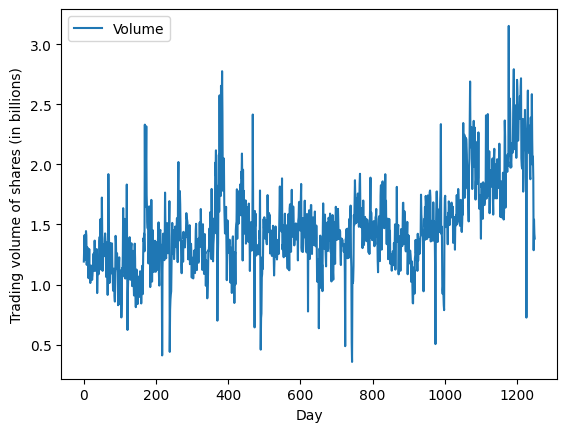

In [27]:
ax = stock_market_data.plot(y="Volume")
ax.set_xlabel("Day")
ax.set_ylabel("Trading volume of shares (in billions)")
plt.show()

In [28]:
# x = stock_market_data.drop(columns=['Today', 'Direction', 'Year'])
x = stock_market_data["Lag1"]
x_with_intercept = add_constant(x)
y = stock_market_data["Direction"] == "Up" * 1

model = OLS(y, x_with_intercept)
results = model.fit()

print(results.summary())
y_pred = results.predict(x_with_intercept)

                            OLS Regression Results                            
Dep. Variable:              Direction   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.976
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.160
Time:                        03:50:59   Log-Likelihood:                -905.40
No. Observations:                1250   AIC:                             1815.
Df Residuals:                    1248   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5185      0.014     36.685      0.0

/tmp/ipykernel_186206/4013781853.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=rf"$y={results.params[0]:.2}+{results.params[0]:.2}x_{{Lag1}}$",


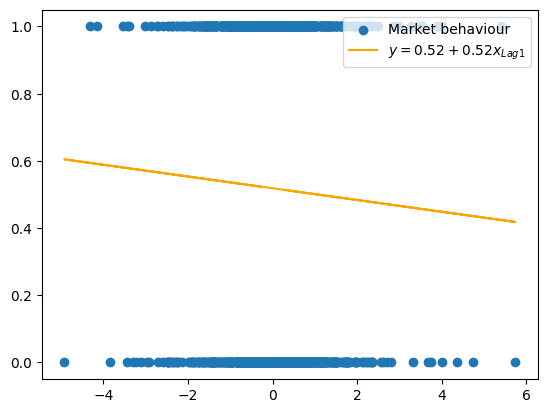

In [29]:
plt.scatter(x, y, label="Market behaviour")
plt.plot(
    x,
    y_pred,
    "orange",
    label=rf"$y={results.params[0]:.2}+{results.params[0]:.2}x_{{Lag1}}$",
)
plt.legend()
plt.show()

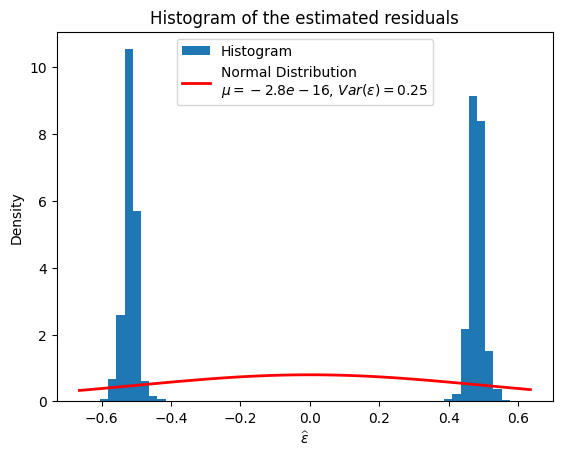

In [30]:
estimated_residuals = results.resid

plt.hist(estimated_residuals, bins=50, density=True, label="Histogram")
xmin, xmax = plt.xlim()

mean, std_dev = np.mean(estimated_residuals), np.std(estimated_residuals)
x_normal = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x_normal, mean, std_dev)

plt.plot(
    x_normal,
    p,
    "r",
    linewidth=2,
    label="Normal Distribution\n"
    rf"$\mu={mean:.2}$, $Var(\varepsilon)={np.var(estimated_residuals):.2}$",
)

plt.legend()
plt.title("Histogram of the estimated residuals")
plt.xlabel(r"$\widehat\varepsilon$")
plt.ylabel("Density")
plt.show()

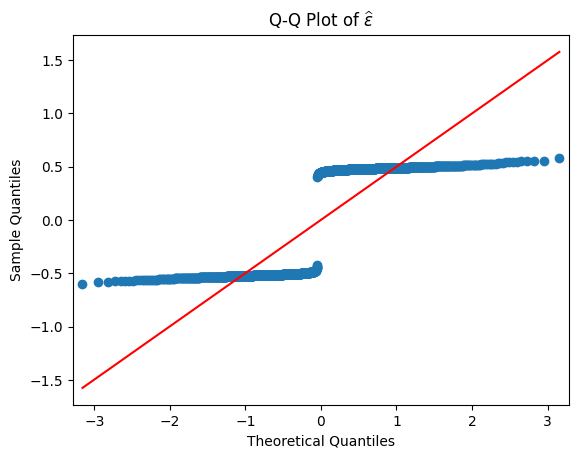

Shapiro-Wilk Test: 
W-statistic=0.672, 
p-value=8.13e-44

Not a normal distribution



In [31]:
qqplot(estimated_residuals, line="s")
plt.title(r"Q-Q Plot of $\widehat\varepsilon$")
plt.show()
shapiro_test = scipy.stats.shapiro(estimated_residuals)
print(
    f"Shapiro-Wilk Test: \nW-statistic={shapiro_test.statistic:.3}, \np-value={shapiro_test.pvalue:.3}"
)
if shapiro_test.pvalue < 0.05:
    print("\nNot a normal distribution\n")
else:
    print("\nIt is a normal distribution\n")

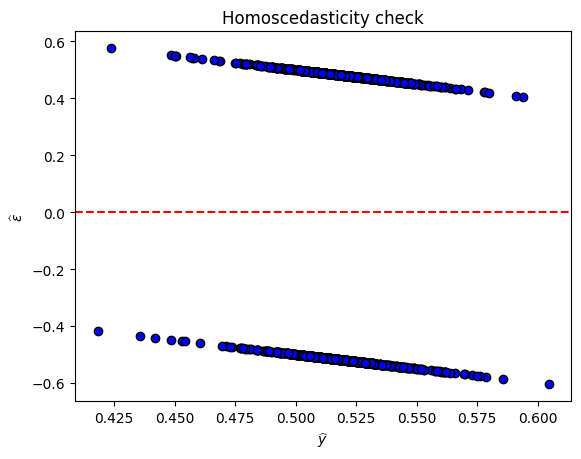

Lagrange multiplier statistic: 0.6850741302624752
p-value: 0.40784492236098724
f-value: 0.6843530777256047
f p-value: 0.4082499215699015

Homoscedasticity: The variance is constant



In [32]:
plt.scatter(y_pred, estimated_residuals, color="blue", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Homoscedasticity check")
plt.xlabel(r"$\widehat y$")
plt.ylabel(r"$\widehat\varepsilon$")
plt.show()

bp_test = het_breuschpagan(estimated_residuals, x_with_intercept)
labels = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test_results = dict(zip(labels, bp_test))

for k, v in test_results.items():
    print(f"{k}: {v}")

if test_results["f p-value"] < 0.05:
    print("\nHeteroscedasticity: The variance is NOT constant\n")
else:
    print("\nHomoscedasticity: The variance is constant\n")